In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
# testing
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
# plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
data_new = pd.read_csv('raw_new.csv', sep=',',engine='python')
x = data_new[['TAAV','INSUL','RH','dayav_ta','dayav_rh','MET','TRAV','VELAV']]
y = data_new['COMF']
y = np.round(y)
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
np.shape(y)

(2466,)

In [5]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
xx = pd.DataFrame(x_pca,columns= ['PC-1','PC-2'])
clf = RandomForestClassifier(n_estimators=50, max_depth = 3, random_state=0)
pipe = Pipeline(steps=[('pca', pca), ('randomforest', clf)])
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
cross_val_score(pipe, X=xx, y=encoded, cv=5)

array([0.37719298, 0.45614035, 0.45535714, 0.45945946, 0.46363636])

In [6]:
# evaluation
predicted = cross_val_predict(clf, x.copy(), encoded, cv=5)
metrics.accuracy_score(encoded, predicted) 

0.44385026737967914

In [3]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.158518)
2. feature 2 (0.156477)
3. feature 0 (0.151794)
4. feature 6 (0.150780)
5. feature 7 (0.141357)
6. feature 3 (0.100329)
7. feature 5 (0.070882)
8. feature 4 (0.069864)


In [46]:
data_new = pd.read_csv('lili_feature.csv', sep=',',engine='python')
x = data_new[['temperature','humidity','clo','skin']]
y = data_new['sensation']

In [47]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.407240)
2. feature 3 (0.271856)
3. feature 1 (0.229847)
4. feature 2 (0.091057)


In [37]:
x0 = x.iloc[np.where(y==0)][['TAAV','INSUL','RH']]
x3 = x.iloc[np.where(y==3)][['TAAV','INSUL','RH']]
xn3 = x.iloc[np.where(y==-3)][['TAAV','INSUL','RH']]

Text(0.5,0,'clothing insulation')

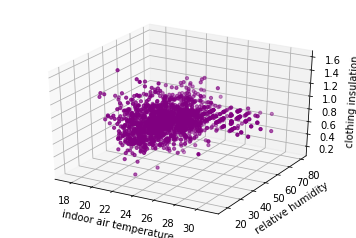

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)
ax.scatter(x0['TAAV'],x0['RH'], x0['INSUL'],c='purple', marker='o',s=10)
#ax.scatter(x3['TAAV'],x3['RH'], x3['INSUL'],c='r', marker='^',s=10)
#ax.scatter(xn3['TAAV'],xn3['RH'], xn3['INSUL'],c='b', marker='^',s=10)
ax.set_xlabel('indoor air temperature')
ax.set_ylabel('relative humidity')
ax.set_zlabel('clothing insulation')